### libraries

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

### read the data

In [6]:
df_new = pd.read_csv("smooth_data_utf-8.csv")

In [7]:
df_new

,date_cre,price,year,month,day,price_smooth
0,2016-01-01 00:00:00,2252.60,2016,1,1,2471.733333
1,2016-01-02 00:00:00,2454.50,2016,1,2,2471.733333
2,2016-01-03 00:00:00,2708.10,2016,1,3,2471.733333
3,2016-01-04 00:00:00,2577.80,2016,1,4,2580.133333
4,2016-01-05 00:00:00,2597.75,2016,1,5,2627.883333
...,...,...,...,...,...,...
2177,2021-12-17 00:00:00,4394.40,2021,12,17,4380.966667
2178,2021-12-18 00:00:00,4389.50,2021,12,18,4394.566667
2179,2021-12-19 00:00:00,4389.50,2021,12,19,4391.133333
2180,2021-12-20 00:00:00,4354.10,2021,12,20,4377.700000


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_cre      2182 non-null   object 
 1   price         2182 non-null   float64
 2   year          2182 non-null   int64  
 3   month         2182 non-null   int64  
 4   day           2182 non-null   int64  
 5   price_smooth  2182 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 102.4+ KB


In [9]:
import pandas as pd
df_new['date_cre'] = pd.to_datetime(df_new['date_cre'])

In [10]:
print(df_new.to_markdown())

|      | date_cre            |   price |   year |   month |   day |   price_smooth |
|-----:|:--------------------|--------:|-------:|--------:|------:|---------------:|
|    0 | 2016-01-01 00:00:00 | 2252.6  |   2016 |       1 |     1 |        2471.73 |
|    1 | 2016-01-02 00:00:00 | 2454.5  |   2016 |       1 |     2 |        2471.73 |
|    2 | 2016-01-03 00:00:00 | 2708.1  |   2016 |       1 |     3 |        2471.73 |
|    3 | 2016-01-04 00:00:00 | 2577.8  |   2016 |       1 |     4 |        2580.13 |
|    4 | 2016-01-05 00:00:00 | 2597.75 |   2016 |       1 |     5 |        2627.88 |
|    5 | 2016-01-06 00:00:00 | 2617.7  |   2016 |       1 |     6 |        2597.75 |
|    6 | 2016-01-07 00:00:00 | 2903.8  |   2016 |       1 |     7 |        2706.42 |
|    7 | 2016-01-08 00:00:00 | 2887.8  |   2016 |       1 |     8 |        2803.1  |
|    8 | 2016-01-09 00:00:00 | 2813.8  |   2016 |       1 |     9 |        2868.47 |
|    9 | 2016-01-10 00:00:00 | 2786.8  |   2016 |       1 |    10

### prepare the data

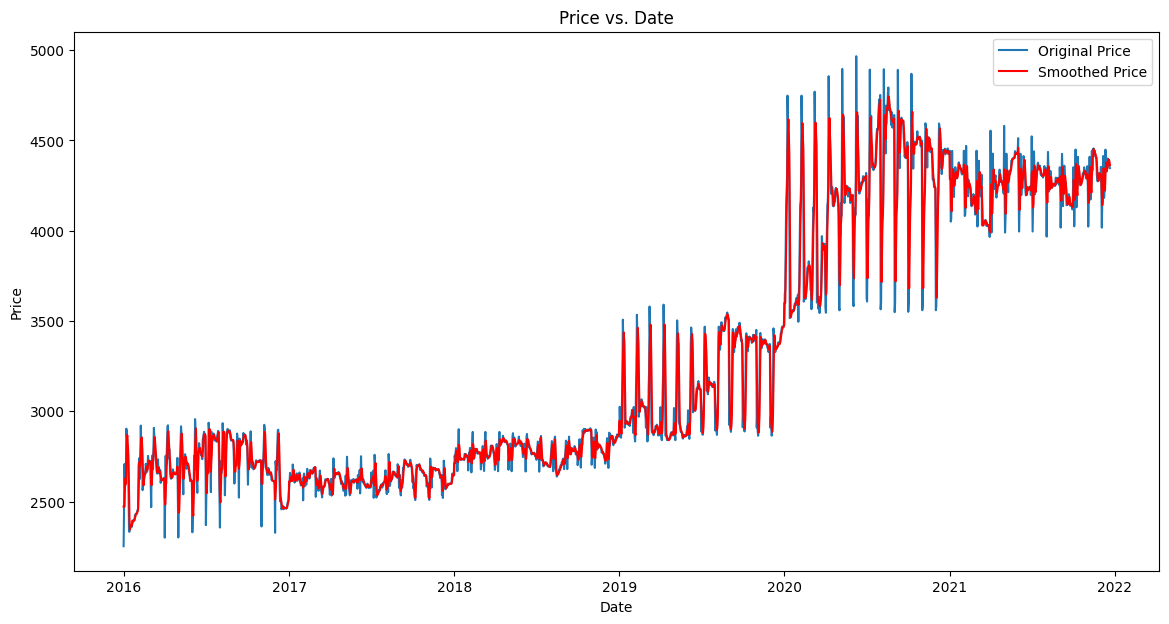

In [11]:
import matplotlib.pyplot as plt

# Assuming 'date_cre' is the date column, 'price' is the original price column
# and 'price_smooth' is the column after applying the smoothing method

# Plot original price
plt.figure(figsize=(14, 7))
plt.plot(df_new['date_cre'], df_new['price'], label='Original Price')

# Plot smoothed price
plt.plot(df_new['date_cre'], df_new['price_smooth'], label='Smoothed Price', color='red')

plt.title('Price vs. Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [12]:
df_new = df_new.drop(columns = 'price')
df_new = df_new.drop(columns = 'year')
df_new = df_new.drop(columns = 'month')
df_new = df_new.drop(columns = 'day')

In [13]:
df_new

,date_cre,price_smooth
0,2016-01-01,2471.733333
1,2016-01-02,2471.733333
2,2016-01-03,2471.733333
3,2016-01-04,2580.133333
4,2016-01-05,2627.883333
...,...,...
2177,2021-12-17,4380.966667
2178,2021-12-18,4394.566667
2179,2021-12-19,4391.133333
2180,2021-12-20,4377.700000


### ADF(Augmented Dickey-Fuller) test

The ADF test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

In [14]:
df_new.set_index('date_cre', inplace=True)

# Perform Augmented Dickey-Fuller test on 'price'
result = adfuller(df_new['price_smooth'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.034912
p-value: 0.961326
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The results of your Augmented Dickey-Fuller (ADF) test can be interpreted as follows:

- **ADF Statistic**: This is the result of the test. In your case, it's -0.050549. The more negative this statistic, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence. In your case, the value is quite close to zero, which indicates that the series is likely non-stationary.

- **p-value**: This is the probability that you would see these results if the null hypothesis were true. In your case, the p-value is 0.954147, which is much larger than the typical threshold of 0.05. This means that you fail to reject the null hypothesis, and the series is likely non-stationary.

- **Critical Values**: These are the test statistic values at which you can reject the null hypothesis if the absolute value of the ADF statistic is greater than the critical value at a given level of confidence. In your case, the critical values are -3.433 at 1%, -2.863 at 5%, and -2.567 at 10%. Since your ADF statistic is greater than all of these values, you fail to reject the null hypothesis at all these levels.

In conclusion, your time series data appears to be non-stationary based on the ADF test. 

### convert it stationary

In [15]:
df_new['pass_diff']=df_new['price_smooth'].diff(periods=1)   ## applied diff on price lag=1

In [16]:
df_new

,price_smooth,pass_diff
date_cre,,
2016-01-01,2471.733333,NaN
2016-01-02,2471.733333,0.000000
2016-01-03,2471.733333,0.000000
2016-01-04,2580.133333,108.400000
2016-01-05,2627.883333,47.750000
...,...,...
2021-12-17,4380.966667,22.066667
2021-12-18,4394.566667,13.600000
2021-12-19,4391.133333,-3.433334


In [17]:
df_new=df_new.dropna()

In [18]:
df_new

,price_smooth,pass_diff
date_cre,,
2016-01-02,2471.733333,0.000000
2016-01-03,2471.733333,0.000000
2016-01-04,2580.133333,108.400000
2016-01-05,2627.883333,47.750000
2016-01-06,2597.750000,-30.133333
...,...,...
2021-12-17,4380.966667,22.066667
2021-12-18,4394.566667,13.600000
2021-12-19,4391.133333,-3.433334


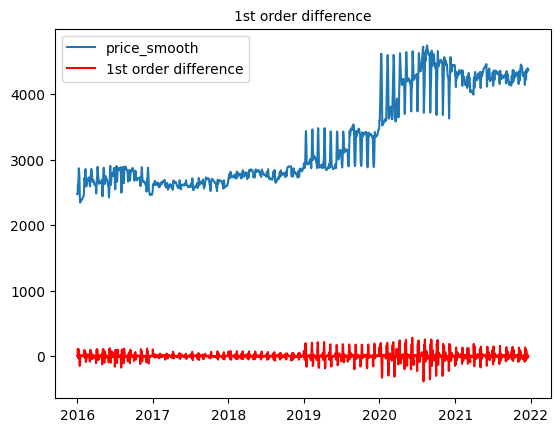

In [19]:
## plot
plt.title("1st order difference", size=10)
plt.plot(df_new['price_smooth'], label='price_smooth')
plt.plot(df_new['pass_diff'], label = '1st order difference', color='red')
plt.legend()

In [20]:
## calculate autocorrelation
acf_values = acf(df_new['pass_diff'])
np.round(acf_values,2)

array([ 1.  ,  0.61,  0.17, -0.16, -0.16, -0.2 , -0.27, -0.28, -0.16,
       -0.06,  0.01,  0.01,  0.  ,  0.01,  0.01,  0.02,  0.02,  0.01,
        0.01,  0.02,  0.02, -0.01, -0.1 , -0.2 , -0.27, -0.23, -0.16,
       -0.11,  0.02,  0.33,  0.64,  0.65,  0.31, -0.01])

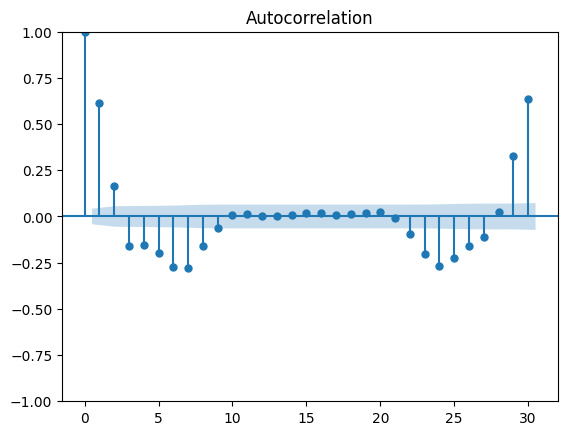

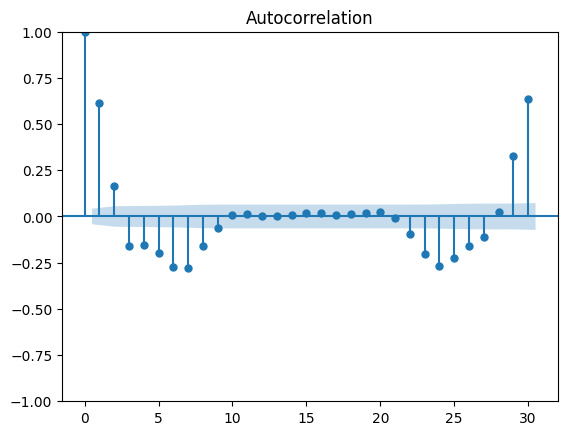

In [21]:
## plot ACF
plot_acf(df_new['pass_diff'], lags=30)
## shadeed region is standard error region
## 1st values wil be 1 always

### PACF

In [22]:
## calculate pacf
## it will give direct values
pacf_values = pacf(df_new['pass_diff'])
np.round(pacf_values,2)

array([ 1.  ,  0.61, -0.34, -0.16,  0.18, -0.3 , -0.19,  0.08, -0.08,
       -0.15,  0.08, -0.1 , -0.15,  0.06, -0.07, -0.07,  0.03, -0.05,
       -0.04,  0.  , -0.02, -0.09, -0.15, -0.17, -0.18, -0.11, -0.24,
       -0.28,  0.03,  0.28,  0.23,  0.11, -0.08,  0.02])

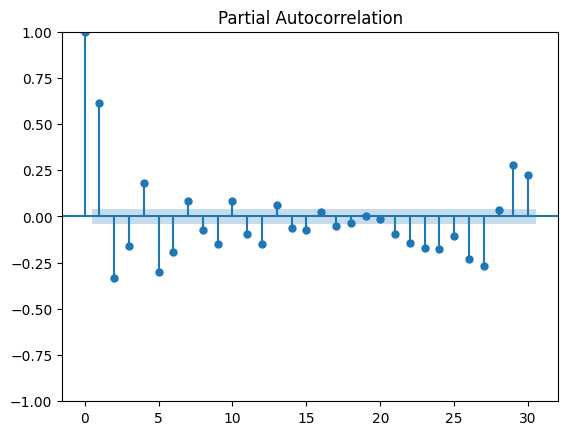

In [23]:
## plot pacf
plot_pacf(df_new['pass_diff'], lags=30);

In [24]:
df_new.reset_index(inplace=True)

In [25]:
df_new.set_index('date_cre', inplace=True)

# Perform Augmented Dickey-Fuller test on 'price'
result = adfuller(df_new['pass_diff'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -28.180760
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


The results of your Augmented Dickey-Fuller (ADF) test can be interpreted as follows:

- **ADF Statistic**: This is the result of the test. In your case, it's -25.645933. The more negative this statistic, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence. In your case, the value is quite negative, which indicates that the series is likely stationary.

- **p-value**: This is the probability that you would see these results if the null hypothesis were true. In your case, the p-value is 0.000000, which is much smaller than the typical threshold of 0.05. This means that you can reject the null hypothesis, and the series is likely stationary.

- **Critical Values**: These are the test statistic values at which you can reject the null hypothesis if the absolute value of the ADF statistic is greater than the critical value at a given level of confidence. In your case, the critical values are -3.433 at 1%, -2.863 at 5%, and -2.567 at 10%. Since your ADF statistic is less than all of these values, you can reject the null hypothesis at all these levels.

In conclusion, your time series data appears to be stationary based on the ADF test. 

### model building 

In [26]:
df_new

,price_smooth,pass_diff
date_cre,,
2016-01-02,2471.733333,0.000000
2016-01-03,2471.733333,0.000000
2016-01-04,2580.133333,108.400000
2016-01-05,2627.883333,47.750000
2016-01-06,2597.750000,-30.133333
...,...,...
2021-12-17,4380.966667,22.066667
2021-12-18,4394.566667,13.600000
2021-12-19,4391.133333,-3.433334


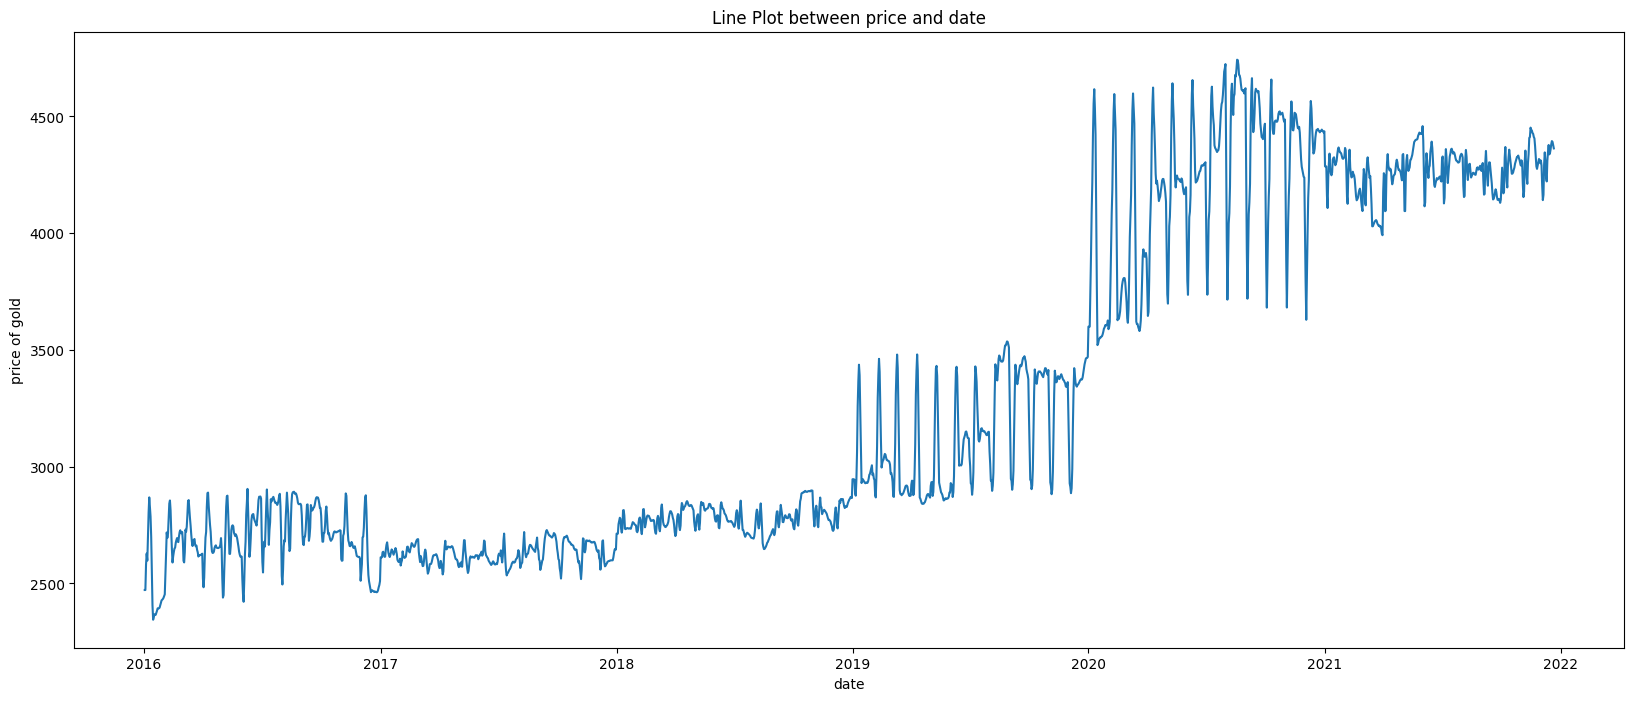

In [27]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_new, x="date_cre", y="price_smooth")
plt.title('Line Plot between price and date')
plt.xlabel('date')
plt.ylabel('price of gold')
plt.show()
## there is a increasing trend in gold prices

### building the model on sarimax 

sarimax parameters(p,d,q)

Sure, this code is used to find the best parameters for a Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model (SARIMAX) for time series forecasting. Here's a breakdown:

1. **Import necessary libraries**: The code begins by importing the necessary Python libraries - `itertools`, `numpy`, `pandas`, `SARIMAX` from `statsmodels.tsa.statespace`, and `warnings`.

2. **Define the p, d, and q parameters**: These parameters are used in the ARIMA model. `p` is the order of the AutoRegressive part, `d` is the degree of differencing, and `q` is the order of the Moving Average part. The code sets each of these parameters to take any value between 0 and 2.

3. **Generate all different combinations of p, d, and q**: The code uses the `itertools.product` function to generate all possible combinations of the `p`, `d`, and `q` values.

4. **Generate all different combinations of seasonal p, d, and q**: The code generates all possible combinations of the `p`, `d`, and `q` values for the seasonal component of the model. The seasonal period is set to 12, indicating monthly data.

5. **Ignore warning messages**: The code sets the warnings filter to "ignore", which will prevent warning messages from being displayed.

6. **Find the best model**: The code initializes variables to store the best Akaike Information Criterion (AIC), and the corresponding `p`, `d`, `q` values. It then iterates over all combinations of `p`, `d`, `q` and seasonal `p`, `d`, `q`. For each combination, it tries to fit a SARIMAX model and calculates the AIC. If the AIC is lower than the current best AIC, it updates the best AIC and the corresponding parameters.

7. **Print the best model**: Finally, the code prints the best SARIMAX model and its AIC.

The SARIMAX model is a type of ARIMA model that can handle seasonality and exogenous variables. The AIC is a measure of the quality of a statistical model - lower values indicate a better fit to the data. The code is trying to find the SARIMAX model that best fits the 'price' data in the `df` DataFrame. The `enforce_stationarity` and `enforce_invertibility` parameters are set to False, which means the model does not enforce the stationarity and invertibility conditions. This can sometimes lead to better results, but it can also lead to non-sensical models if the data is not stationary or invertible. The code uses a try-except block to handle any errors that might occur during the model fitting process. If an error occurs, it simply continues to the next combination of parameters. This is a common approach in hyperparameter tuning - if a certain set of parameters leads to an error, you simply skip it and move on to the next set. The code does not print anything during the model fitting process, but you could uncomment the print statement to see the AIC for each combination of parameters. The final print statement displays the best combination of parameters and the corresponding AIC. This is the model that you would likely want to use for further forecasting. Note that this code assumes that you have a DataFrame `df` with a 'price' column. You would need to replace 'price' with the actual column name in your DataFrame. Also, the code does not split the data into training and testing sets, which is something you would typically want to do when building a forecasting model. You would train the model on the training set and then evaluate its performance on the testing set. This code is simply trying to find the best parameters for the SARIMAX model, not actually doing any forecasting. Once you have the best parameters, you could use them to fit a SARIMAX model to your training data and then generate forecasts for your testing data. You could also use cross-validation to get a more robust estimate of the model's performance. This would involve splitting your data into multiple training and testing sets, fitting a model to each training set, generating forecasts for each testing set, and then averaging the results. This is a more computationally intensive process, but it can give you a better idea of how your model is likely to perform on new data. I hope this helps! Let me know if you have any other questions.

### dont run ths code

In [26]:
### dont run this code
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Specify to ignore warning messages
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df_new['pass_diff'],
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


Best SARIMAX(2, 0, 2)x(2, 1, 2, 12)12 model - AIC:22049.924592235424


In [4]:
df_new

,date_cre,price,year,month,day,price_smooth
0,2016-01-01 00:00:00,2252.60,2016,1,1,2471.733333
1,2016-01-02 00:00:00,2454.50,2016,1,2,2471.733333
2,2016-01-03 00:00:00,2708.10,2016,1,3,2471.733333
3,2016-01-04 00:00:00,2577.80,2016,1,4,2580.133333
4,2016-01-05 00:00:00,2597.75,2016,1,5,2627.883333
...,...,...,...,...,...,...
2177,2021-12-17 00:00:00,4394.40,2021,12,17,4380.966667
2178,2021-12-18 00:00:00,4389.50,2021,12,18,4394.566667
2179,2021-12-19 00:00:00,4389.50,2021,12,19,4391.133333
2180,2021-12-20 00:00:00,4354.10,2021,12,20,4377.700000


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
model = SARIMAX(df_new['pass_diff'],
                order=(2, 0, 2),
                seasonal_order=(2, 1, 2, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


In [28]:
train_data = df_new['pass_diff'].iloc[:-12]  # all but the last 12 months
test_data = df_new['pass_diff'].iloc[-12:]  # the last 12 months

In [29]:
model = SARIMAX(train_data,
                order=(2, 0, 2),
                seasonal_order=(2, 1, 2, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

In [30]:
results = model.fit()

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_conf = pred.conf_int()

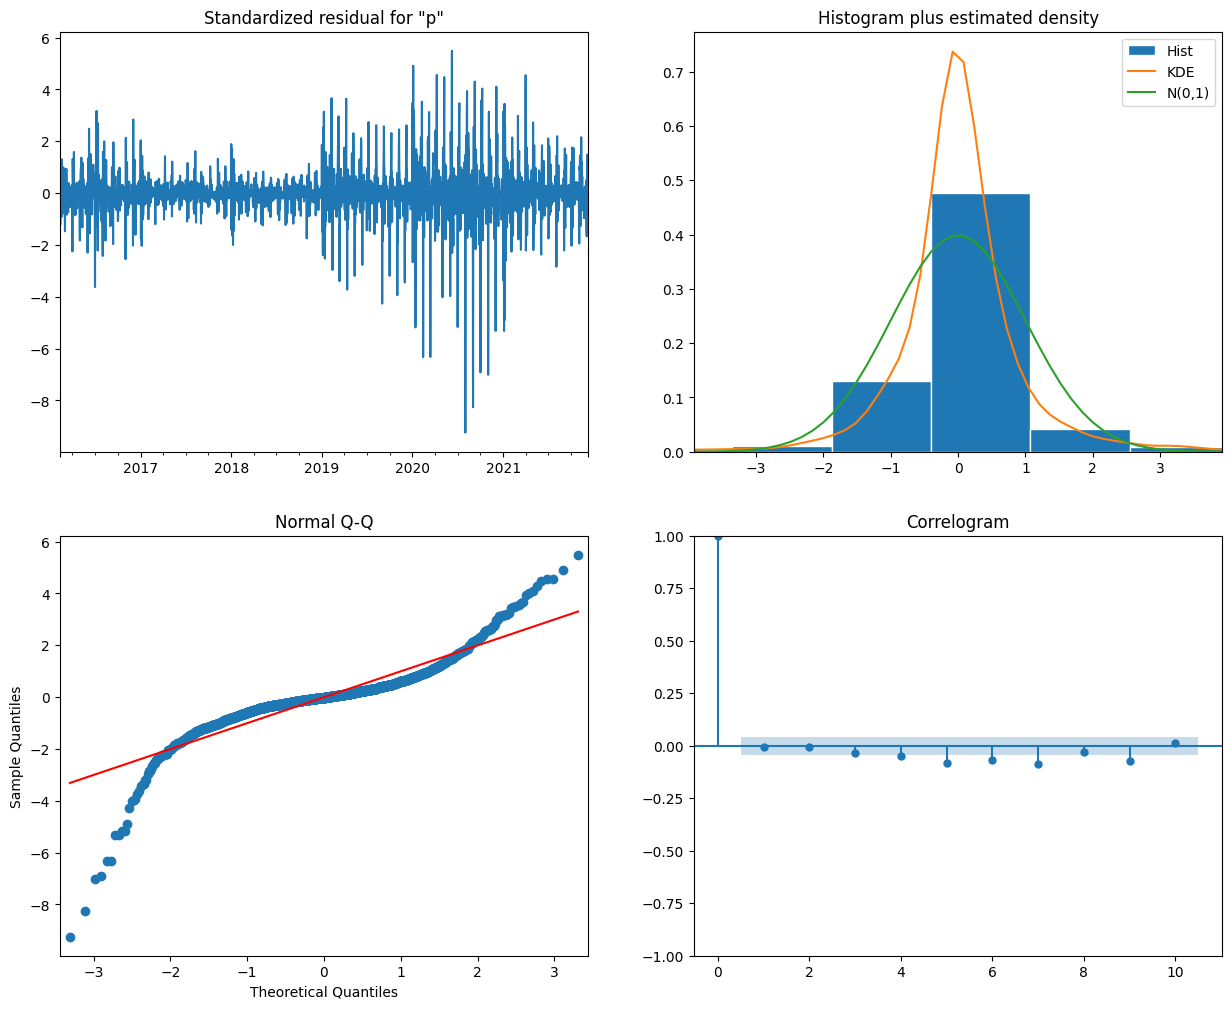

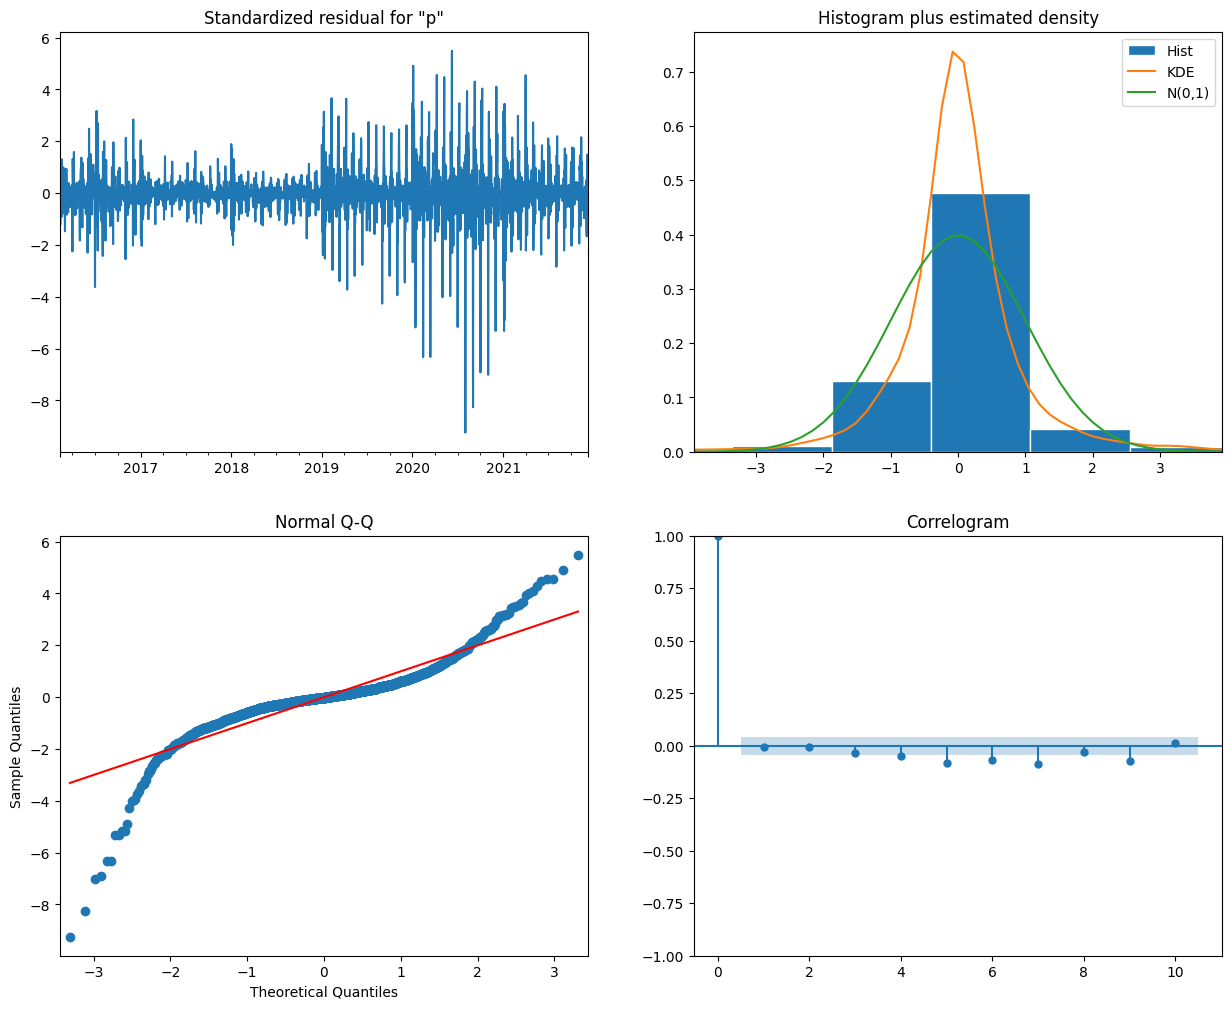

In [32]:
results.plot_diagnostics(figsize=(15, 12))

In [33]:
forecast = results.get_forecast(steps=12)

In [34]:
# Get the forecasted values
forecasted_values = forecast.predicted_mean

In [35]:
# Get the confidence intervals
confidence_intervals = forecast.conf_int()

In [36]:
print(forecasted_values)
print(confidence_intervals)

2021-12-10   -12.702741
2021-12-11    20.036191
2021-12-12     6.122747
2021-12-13    -5.918869
2021-12-14     7.833292
2021-12-15     9.927512
2021-12-16    14.906783
2021-12-17    -0.779504
2021-12-18    -3.082508
2021-12-19    -7.461355
2021-12-20     2.234612
2021-12-21     1.770939
Freq: D, Name: predicted_mean, dtype: float64
            lower pass_diff  upper pass_diff
2021-12-10       -92.990851        67.585369
2021-12-11       -85.319680       125.392061
2021-12-12      -108.672384       120.917879
2021-12-13      -121.762329       109.924591
2021-12-14      -108.736470       124.403054
2021-12-15      -106.691676       126.546699
2021-12-16      -101.769083       131.582650
2021-12-17      -117.457413       115.898405
2021-12-18      -119.764770       113.599755
2021-12-19      -124.143675       109.220965
2021-12-20      -114.448028       118.917252
2021-12-21      -114.911686       118.453565


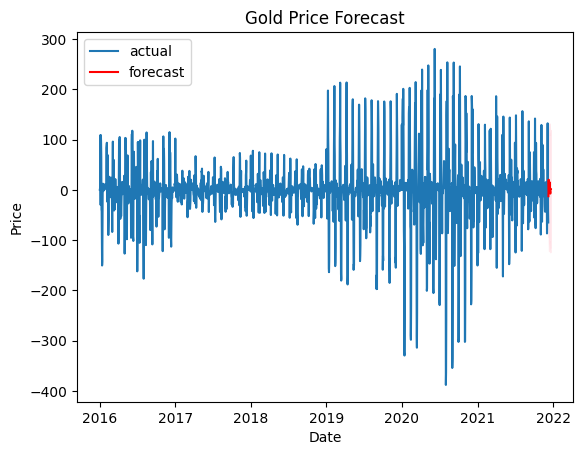

In [37]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(train_data.index, train_data, label='actual')

# Plot the forecasted values
plt.plot(forecasted_values.index, forecasted_values, color='red', label='forecast')

# Plot the confidence intervals
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=.3)

plt.title('Gold Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
